In [64]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mojtaba142/hotel-booking")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/mojtaba142/hotel-booking/versions/1


In [65]:
import pandas as pd # pour charger et manipuler les donnees
# charger le jeu de donnees
# 'hotel_bookings.csv' est le nom du fichier a charger
#charger le fichier
data=pd.read_csv(path + '/hotel_booking.csv')
print("Apercu des donnees")
data

Apercu des donnees


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [66]:
#Remplacer les valeurs manquantes dans la colonne agent
data['agent']=data['agent'].fillna(0) #Remplacer les valeurs manquantes par zero
#Remplacer les valeurs manquantes dans la colonne company
data['company']=data['company'].fillna(0) #Remplir les valeurs manquantes pour company avec zero
data['country']=data['country'].dropna()

data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [67]:
#conversion des types de donnees
# conversion en datetime
data['date_reservation'] = pd.to_datetime(
    data['arrival_date_year'].astype(str) + '-' +
    data['arrival_date_month'].astype(str).str.zfill(2) + '-' +
    data['arrival_date_day_of_month'].astype(str).str.zfill(2)
)
# Transformer les variables categoriques en type category
data['is_canceled']=data['is_canceled'].astype('category') # Covertir is_canceled en type category
data['hotel']=data['hotel'].astype('category') # Covertir 'hotel'en type category
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,date_reservation
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,2017-08-31


In [68]:
#Creer un dictionnaire pour convertir les noms des mois en chiffre
month_map={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,'July':7,"August":8,"September":9,"October":10,"November":11,"December":12}
#Ajouter une colonne 'month_number' avec les numeros des mois
data['month_number']=data['arrival_date_month'].map(month_map)
#Afficher les reservations par mois dans l'ordre
Reservation_par_mois=data.groupby('arrival_date_month').size().reindex(month_map.keys())
Reservation_par_mois

,0
arrival_date_month,
January,5929
February,8068
March,9794
April,11089
May,11791
June,10939
July,12661
August,13877
September,10508


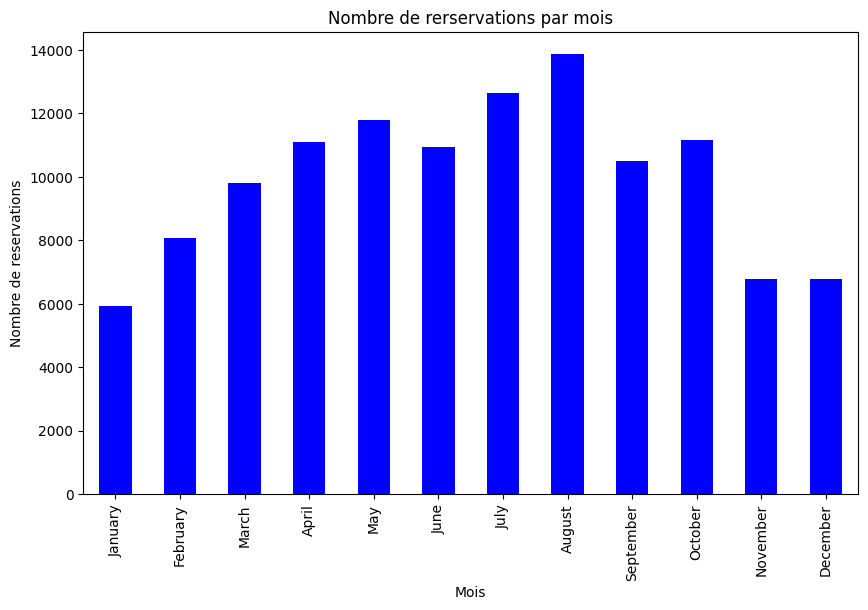

In [69]:
#Visualiser les resultats mensuels
import matplotlib.pyplot as plt # pour visualiser les donnees

#Tracer un graphique en barre
Reservation_par_mois.plot(kind='bar',color='blue',figsize=(10,6))
#Ajouter des titres et des etiquettes
plt.title('Nombre de rerservations par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de reservations')
#Afficher le graphique
plt.show()

In [70]:
#Etudier les resrvations par saison
month_map={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,'July':7,"August":8,"September":9,"October":10,"November":11,"December":12}

data['month_number']=data['arrival_date_month'].map(month_map)

#Fonction pour classer les mois en saison
def get_season(month):
    if month in [12,1,2]:
        return 'Hiver'
    elif month in [3,4,5]:
        return 'printemps'
    elif month in [6,7,8]:
        return 'ete'
    elif month in [9,10,11]:
        return 'automne'
#Appliquer la fonction sur la colonne'month_number'
data['saison']=data['month_number'].apply(get_season)
#comptez les reservations par saison
reservation_par_saison=data['saison'].value_counts()
reservation_par_saison

,count
saison,
ete,37477
printemps,32674
automne,28462
Hiver,20777


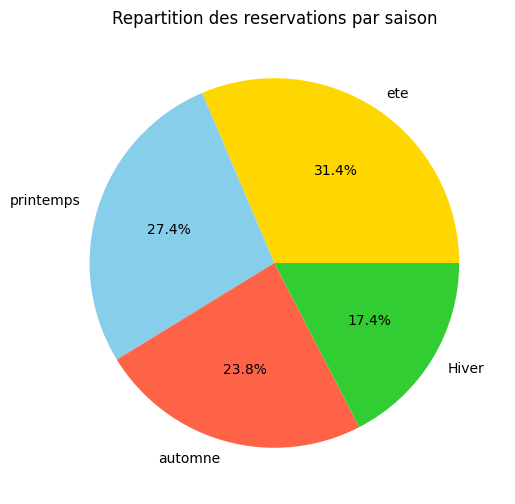

,adr
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
...,...
119385,96.14
119386,225.43
119387,157.71
119388,104.40


In [71]:
#Visualiser les resultats saisonniers
import matplotlib.pyplot as plt # pour visualiser les donnees

#Tracer un graphique en camembert
reservation_par_saison.plot(kind='pie',autopct='%1.1f%%',colors=['#FFD700','#87CEEB','#FF6347','#32CD32'],figsize=(7,6))
#Ajouter un titre
plt.title('Repartition des reservations par saison')
#Supprimer l'etiquette de l'axe y
plt.ylabel('')
#Afficher le graphique
plt.show()
data['adr']


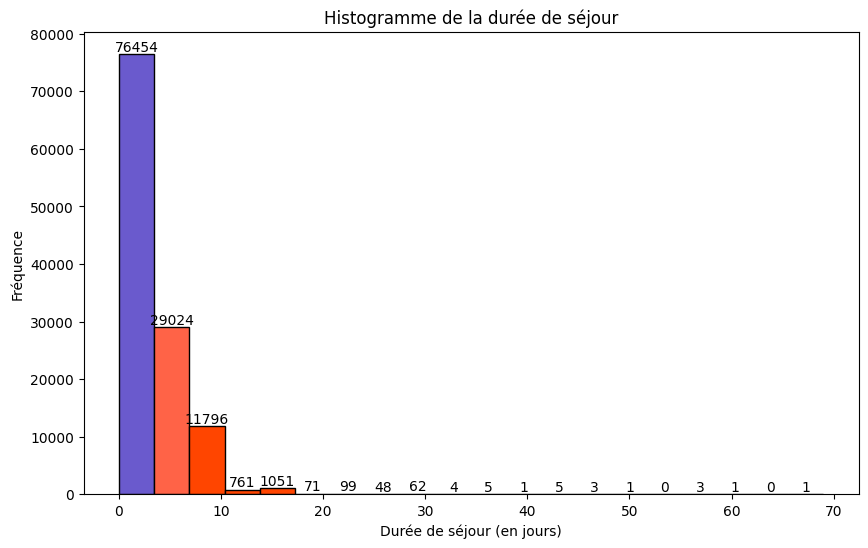

In [72]:
import matplotlib.pyplot as plt
#visualisation de la duree de sejour
data['duree_de_sejour']=data['stays_in_weekend_nights']+data['stays_in_week_nights']

# Remplacez-la si nécessaire par le nom exact de la colonne
durée_de_sejour = data['duree_de_sejour']

# Créer l'histogramme
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(durée_de_sejour, bins=20, color='skyblue', edgecolor='black')

# Personnalisation des couleurs des barres
for patch in patches:
    patch.set_facecolor(np.random.choice(['#FF6347', '#6A5ACD', '#3CB371', '#FF4500']))  # Choix de couleurs personnalisées

# Ajouter les fréquences au-dessus des barres
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i],
             str(int(n[i])), ha='center', va='bottom', fontsize=10)

# Ajouter des labels et un titre
plt.xlabel('Durée de séjour (en jours)')
plt.ylabel('Fréquence')
plt.title('Histogramme de la durée de séjour')

# Afficher l'histogramme
plt.show()


In [73]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Nettoyer les valeurs manquantes
data = data.dropna()

# Extraction des variables
X = data[['lead_time', 'hotel', 'adr', 'month_number', ]].copy()
y = data['is_canceled'].values

# Encodage de la variable catégorielle 'hotel'
X = pd.get_dummies(X, columns=['hotel'])  # One-hot encoding

# Vérifier et convertir toutes les données en float64
X = X.astype(np.float64)
y = y.astype(np.float64)


# Standardisation des colonnes numériques ('lead_time', 'adults', 'children', 'babies')
scaler = StandardScaler()
X[['lead_time','adr', 'month_number']] = scaler.fit_transform(X[['lead_time', 'adr', 'month_number']])
X2 = X
# Conversion en matrice numpy et ajout de la colonne de biais
X = np.hstack((np.ones((X.shape[0], 1)), X.values))

# Vérifier que X et y sont bien en float64
X = X.astype(np.float64)
y = y.astype(np.float64)

# Estimation des coefficients de régression avec la pseudo-inverse
beta = np.linalg.pinv(X.T @ X) @ X.T @ y

# Afficher les coefficients
print(f"Coefficients : {beta[1:]}, Intercept : {beta[0]}")


Coefficients : [ 0.14129206  0.02810797 -0.01584475  0.17278536  0.06250673], Intercept : 0.23529209051292882


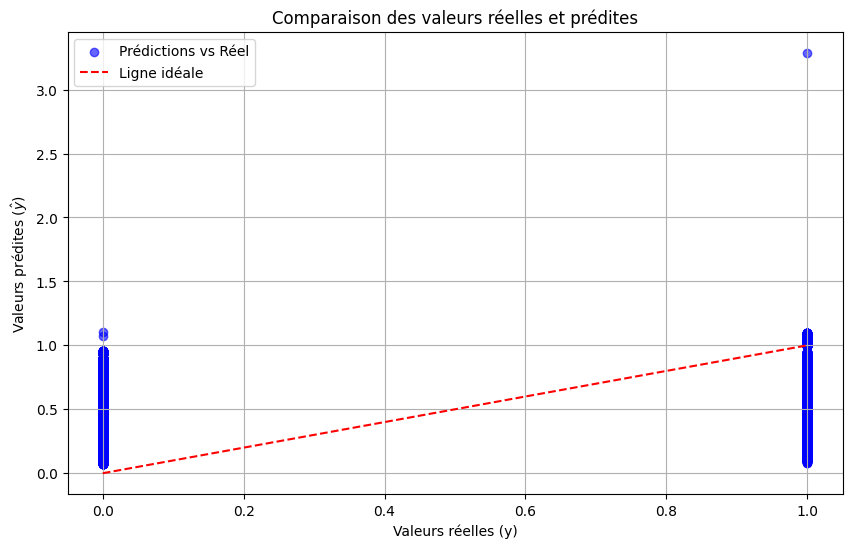

In [74]:
import matplotlib.pyplot as plt
y_pred = X @ beta  # Calcul des valeurs prédites

# Création du graphique
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label="Prédictions vs Réel")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Ligne idéale")
plt.xlabel("Valeurs réelles (y)")
plt.ylabel("Valeurs prédites ($\hat{y}$)")
plt.title("Comparaison des valeurs réelles et prédites")
plt.legend()
plt.grid(True)
plt.show()

In [75]:
import statsmodels.api as sm

# scaler = StandardScaler()

X2=sm.add_constant(X2)
model=sm.OLS(y,X2).fit()

print(model.summary())

# Affichage des coefficients avec leur signification
coefficients = model.params

print("\nCoefficients et impact de chaque variable :")
for var, coef in zip(X2.columns, coefficients):
    print(f"{var} : {coef:.4f}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     2705.
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:56:01   Log-Likelihood:                -75818.
No. Observations:              118898   AIC:                         1.516e+05
Df Residuals:                  118892   BIC:                         1.517e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.867e+11   1.48